Worst Case Error: 0.5049752469181039
7 Best Error: 0.4866785403813352
16 Best Error: 0.46564753889287636
21 Best Error: 0.4455523021104262
99 Best Error: 0.3901152377362186
131 Best Error: 0.36613427485360583
415 Best Error: 0.3600785814558759
673 Best Error: 0.34437861400129244
837 Best Error: 0.33472519758768127
1004 Best Error: 0.30762636077585437
2208 Best Error: 0.29300888731359664
3255 Best Error: 0.2826341454293798
7033 Best Error: 0.2807454923656364
7840 Best Error: 0.2625619142675472
7877 Best Error: 0.2597830014646222
7954 Best Error: 0.23458075165425024
12672 Best Error: 0.23405745479939127
13441 Best Error: 0.23109409273995676
16828 Best Error: 0.21502736026145788
20089 Best Error: 0.19546043755876946
107214 Best Error: 0.18296195858597075
232885 Best Error: 0.16186993652007878
338908 Best Error: 0.11372214160834321
9799882 Best Error: 0.11321919905957381
31752421 Best Error: 0.0931063590827907
83247238 Best Error: 0.08912392910725128
90302481 Best Error: 0.0857281876914096

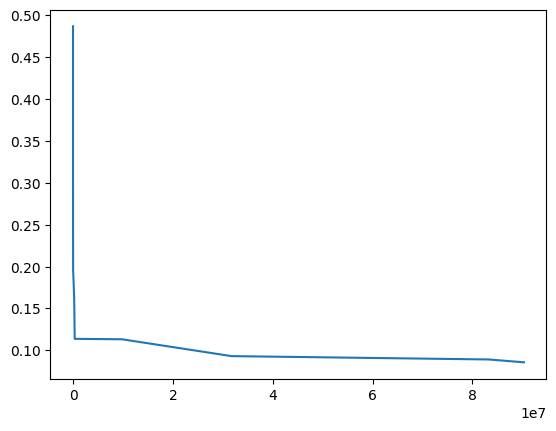

In [276]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


array = [
    [0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.9206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6406, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0.07943],
    [0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6406, 0, 0, 0, 0.6406, 0.07943, 0, 0, 0, 0, 0.07943, 0, 0, 0.07943, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07943, 0.07943, 0, 0]
]

b = [0.4, 0.1, 0.2, 0.05, 0.05, 0, 0.2]

# Calculate worst case error
initial_phi = np.zeros(len(array[0]))
initial_b = np.dot(array, initial_phi)
error = np.linalg.norm(b - initial_b)
print("Worst Case Error:", error)



# Initialize best phi and error
best_phi = initial_phi.copy()
best_error = error.copy()
error_values = []
sim_values = []

# Trying to solve for best phi using montecarlo
for sim in range(100_000_000):
    
    # Randomly initialize phi
    k= np.random.randint(1, 9)
    #k = len(array[0])
    initial_phi = np.zeros(len(array[0]))
    random_indices = np.random.choice(len(initial_phi), k, replace=False)
    numbers = []
    numbers.append(np.random.uniform(0,1))
    for _ in range(k-1):
           numbers.append(np.random.uniform(0, 1 - np.sum(numbers)))
    initial_phi[random_indices] = numbers

    # Calculate The Dot Product
    computed_b = np.dot(array, initial_phi)

    # Calculate the Error Term
    diff = b - computed_b
    penalty = np.sum(0.1 * diff[diff < 0])  # Only sum negative differences and apply penalty
    error = np.linalg.norm(diff) - 5*penalty + 1.25*np.min( diff[diff > 0]) + 0.2*np.max(diff)

    # Store the best phi and error
    if error< best_error:
        best_error = error.copy()
        best_phi= initial_phi.copy()
        error_values.append(error)
        sim_values.append(sim)
        print(sim, "Best Error:", best_error)



# Reevaluating the error
L2 = np.dot(array, best_phi)
error = np.linalg.norm(L2 - b)
print("Best Error:", error)
print("Best Phi:", np.round(best_phi, 4))

# Plotting the error values for each iteration
plt.plot(sim_values, error_values)


# Checking Excel Found Vertices

In [287]:
best_phi = [0.0058, 0.0631, 0, 0.0541, 0, 0, 0.3964, 0, 0.1984, 0, 0,  0, 0, 0, 0, 0, 0.255,  0, 0.0144, 0, 0,  0,  0, 0, 0, 0, 0, 0,  0, 0]
array1 = [0.4345, 0.1086, 0.2173, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
array2 = [0, 0.1086, 0.2173, 0, 0, 0, 0.4345, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
b = [0.4, 0.1, 0.2, 0.05, 0.05, 0, 0.2]

print ('Given b     ', b)

vertices = [best_phi, array1, array2]

for vertex in vertices:
    comp_b = np.dot(array, vertex)
    error = np.linalg.norm(b - comp_b)
    print("Calculated b", np.round(comp_b,3))
    print('Difference', np.round(b - comp_b,3))
    print(" Error:", error)

    print()

print('Best Phi:', np.round(best_phi,3))

Given b      [0.4, 0.1, 0.2, 0.05, 0.05, 0, 0.2]
Calculated b [0.37  0.058 0.183 0.05  0.009 0.    0.163]
Difference [0.03  0.042 0.017 0.    0.041 0.    0.037]
 Error: 0.07711943385622592

Calculated b [0.4   0.1   0.2   0.    0.    0.    0.153]
Difference [-0.     0.    -0.     0.05   0.05   0.     0.047]
 Error: 0.08463681907466515

Calculated b [0.4   0.1   0.2   0.    0.    0.    0.153]
Difference [-0.     0.    -0.     0.05   0.05   0.     0.047]
 Error: 0.08463681907466515

Best Phi: [0.006 0.063 0.    0.054 0.    0.    0.396 0.    0.198 0.    0.    0.
 0.    0.    0.    0.    0.255 0.    0.014 0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.   ]


Worst Case Error: 0.42472823699506956
57 Best Error: 0.3064783328672051
395 Best Error: 0.24872522786765172
6340 Best Error: 0.23593851438503022
13405 Best Error: 0.22076151700739768
19202 Best Error: 0.21867000692645677
26329 Best Error: 0.15781985777780624
51920 Best Error: 0.12410709629219963
61753 Best Error: 0.08897037690770553
68415 Best Error: 0.07453015288429113
Best Error: 0.05568378270756851
Best Phi: [0.     0.     0.     0.     0.     0.     0.     0.0683 0.1907 0.
 0.4548 0.     0.     0.     0.     0.     0.251  0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]


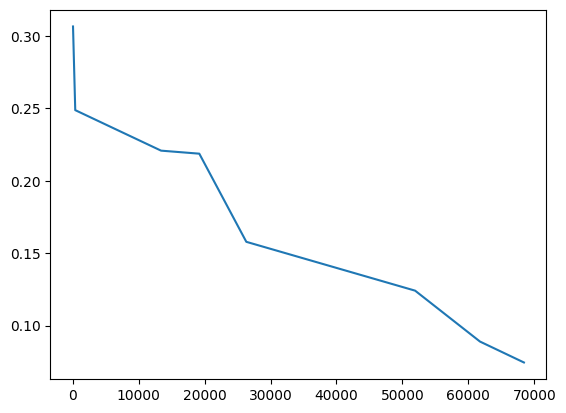

In [279]:
b = np.dot(array, best_phi)

# Calculate worst case error
initial_phi = np.zeros(len(array[0]))
initial_b = np.dot(array, initial_phi)
error = np.linalg.norm(b - initial_b)
print("Worst Case Error:", error)



# Initialize best phi and error
best_phi = initial_phi.copy()
best_error = error.copy()
error_values = []
sim_values = []

# Trying to solve for best phi using montecarlo
for sim in range(1_000_000):
    
    # Randomly initialize phi
    k= np.random.randint(1, 9)
    #k = len(array[0])
    initial_phi = np.zeros(len(array[0]))
    random_indices = np.random.choice(len(initial_phi), k, replace=False)
    numbers = []
    numbers.append(np.random.uniform(0,1))
    for _ in range(k-1):
           numbers.append(np.random.uniform(0, 1 - np.sum(numbers)))
    initial_phi[random_indices] = numbers

    # Calculate The Dot Product
    computed_b = np.dot(array, initial_phi)

    # Calculate the Error Term
    diff = b - computed_b
    penalty = np.sum(0.1 * diff[diff < 0])  # Only sum negative differences and apply penalty
    error = np.linalg.norm(diff) - 5*penalty + 1.25*np.min( diff[diff > 0]) + 0.2*np.max(diff)

    # Store the best phi and error
    if error< best_error:
        best_error = error.copy()
        best_phi= initial_phi.copy()
        error_values.append(error)
        sim_values.append(sim)
        print(sim, "Best Error:", best_error)



# Reevaluating the error
L2 = np.dot(array, best_phi)
error = np.linalg.norm(L2 - b)
print("Best Error:", error)
print("Best Phi:", np.round(best_phi, 4))

# Plotting the error values for each iteration
plt.plot(sim_values, error_values)


In [280]:
array1 = [0.4345, 0.1086, 0.2173, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
array2 = [0, 0.1086, 0.2173, 0, 0, 0, 0.4345, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

print ('Given b     ', b)

vertices = [best_phi, array1, array2]

for vertex in vertices:
    comp_b = np.dot(array, vertex)
    error = np.linalg.norm(b - comp_b)
    print("Calculated b", np.round(comp_b,3))
    print('Difference', np.round(b - comp_b,3))
    print(" Error:", error)

    print()

print('Best Phi:', np.round(best_phi,3))

Given b      [0.34627182 0.05439133 0.17542728 0.         0.         0.
 0.16357492]
Calculated b [0.291 0.063 0.176 0.    0.    0.    0.161]
Difference [ 0.055 -0.009 -0.     0.     0.     0.     0.003]
 Error: 0.05568378270756851

Calculated b [0.4   0.1   0.2   0.    0.    0.    0.153]
Difference [-0.054 -0.046 -0.025  0.     0.     0.     0.01 ]
 Error: 0.07531740318282622

Calculated b [0.4   0.1   0.2   0.    0.    0.    0.153]
Difference [-0.054 -0.046 -0.025  0.     0.     0.     0.01 ]
 Error: 0.07531740318282622

Best Phi: [0.    0.    0.    0.    0.    0.    0.    0.068 0.191 0.    0.455 0.
 0.    0.    0.    0.    0.251 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.   ]
